## FIFA World Cup 2022 Tweets

## About Dataset
Football is one of the most loved sports worldwide. The FIFA World Cup, a global football sporting event that takes place every four years, is in Qatar this year. This dataset contains 30,000 tweets from the first day of the FIFA World Cup 2022.

## Data Collection
The dataset was created using the Snscrape and the cardiffnlp/twitter-roberta-base-sentiment-latest model in Hugging Face Hub.

## Content
The dataset contains as following columns:

1.Date Created 2.Number of Likes 3.Source of Tweet 4.Tweet 5.Sentiment

In [1]:
# loading dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


In [2]:
# loading our tweets dataset
tweets=pd.read_csv(r'C:\Users\Hp\Downloads\fifa_world_cup_2022_tweets.csv')
tweets.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
0,0,2022-11-20 23:59:21+00:00,4,Twitter Web App,What are we drinking today @TucanTribe \n@MadB...,neutral
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative


In [3]:
# checking number of row and columns 
tweets.shape

(22524, 6)

In [4]:
# checking for missing values
tweets.isnull().sum()

Unnamed: 0         0
Date Created       0
Number of Likes    0
Source of Tweet    0
Tweet              0
Sentiment          0
dtype: int64

In [5]:
# cheking for duplicates in our dataset
tweets.duplicated().any()

False

### Checking Distribution of target Variable

Text(0.5, 1.0, 'distribution of Target Variable')

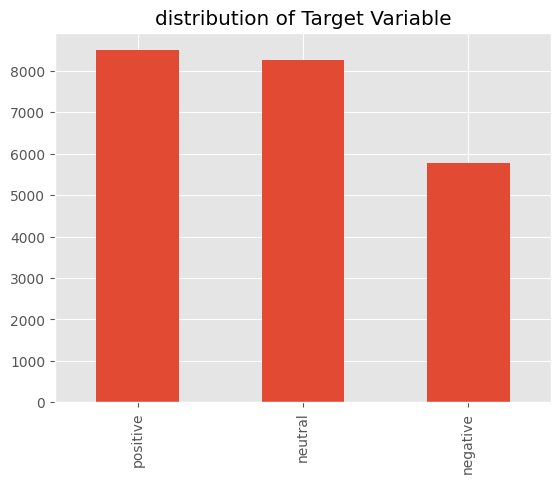

In [6]:
tweets['Sentiment'].value_counts().plot.bar()
plt.title('distribution of Target Variable')

#### for our analysis we will focus on tweets with either positive sentiment or negative sentiment we will therefore drop all raws with neutral tweets

In [7]:
tweets=tweets.query("Sentiment!= 'neutral'")
tweets

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,positive
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,positive
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,positive
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",negative
5,5,2022-11-20 23:57:32+00:00,0,Twitter for Android,"And like, will the mexican fans be able to scr...",negative
...,...,...,...,...,...,...
22517,22517,2022-11-20 00:00:39+00:00,2,Twitter for iPhone,The World Cup starts TODAY!\n\n#Qatar2022 #Foo...,positive
22518,22518,2022-11-20 00:00:35+00:00,0,Twitter for iPhone,"World Cup starts today, and I could not give a...",negative
22519,22519,2022-11-20 00:00:21+00:00,1,Twitter Web App,Here We go World cup 2022 #WorldCup2022,positive
22521,22521,2022-11-20 00:00:01+00:00,2,Twitter for iPhone,Great thread to read before the start of #Worl...,positive


In [8]:
# converting our target variable to numerical
tweets['Sentiment']=tweets['Sentiment'].replace({'positive':1,'negative':0})
tweets['Sentiment']

1        1
2        1
3        1
4        0
5        0
        ..
22517    1
22518    0
22519    1
22521    1
22522    1
Name: Sentiment, Length: 14273, dtype: int64

## Data Cleaning

In [9]:
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [10]:
port= PorterStemmer() #for word stemming
stop_words=set(stopwords.words('english'))

In [11]:
# a reusable function to clean and preprocess out tweets 
def cleaned_tweet(document):
    document=re.sub('[^a-zA-Z]',' ',document) # remove all non alphabets
    document=document.lower() # convert document to lower case
    document =word_tokenize(document) # tokenizing
    document=[port.stem(word) for word in document] # stemming
    document=[word for word in document if not word in stop_words] # get rid of stop words
    document=' '.join(document)
    return document

In [12]:
tweets['cleaned_tweet']=tweets['Tweet'].apply(cleaned_tweet)
tweets.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweet,Sentiment,cleaned_tweet
1,1,2022-11-20 23:59:01+00:00,3,Twitter for iPhone,Amazing @CanadaSoccerEN #WorldCup2022 launch ...,1,amaz canadasocceren worldcup launch video show...
2,2,2022-11-20 23:58:41+00:00,1,Twitter for iPhone,Worth reading while watching #WorldCup2022 htt...,1,worth read watch worldcup http co sqrna dyu
3,3,2022-11-20 23:58:33+00:00,1,Twitter Web App,Golden Maknae shinning bright\n\nhttps://t.co/...,1,golden makna shin bright http co ayzbzgtx jeon...
4,4,2022-11-20 23:58:28+00:00,0,Twitter for Android,"If the BBC cares so much about human rights, h...",0,bbc care much human right homosexu right women...
5,5,2022-11-20 23:57:32+00:00,0,Twitter for Android,"And like, will the mexican fans be able to scr...",0,like mexican fan abl scream puto homophob qata...


## Bag of Words Model (Feature Extraction)

In [13]:
# we will use TfidfVectorizer for feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
vectorize=TfidfVectorizer()

In [14]:
tweet_vector=vectorize.fit_transform(tweets['cleaned_tweet'])
tweet_vector.shape

(14273, 21419)

In [15]:
print(type(tweet_vector))
print(tweet_vector.todense())

<class 'scipy.sparse._csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [16]:
tweet_df=pd.DataFrame(tweet_vector.todense())
tweet_df

,0,1,2,3,4,5,6,7,8,9,...,21409,21410,21411,21412,21413,21414,21415,21416,21417,21418
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14268,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
# split our data into training and testing set
X=tweet_df
y=tweets['Sentiment']

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.2,random_state=34)

## Model Building

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [20]:
from sklearn.metrics import accuracy_score
def model_fit(model,xtrain,xtest,ytrain,ytest):
    model.fit(xtrain,ytrain) # fit model to training set
    y_train_pred=model.predict(xtrain)
    y_test_pred=model.predict(xtest)
    train_score=accuracy_score(ytrain,y_train_pred)
    test_score=accuracy_score(ytest,y_test_pred)
    return {'train_score':train_score,'test_score':test_score}

In [21]:
Lr=LogisticRegression(solver='liblinear') #using default parameters
print(model_fit(Lr,X_train,X_test,y_train,y_test))

{'train_score': 0.9217901558942021, 'test_score': 0.8756567425569177}


In [22]:
Gb=GaussianNB()
print(model_fit(Gb,X_train,X_test,y_train,y_test))

{'train_score': 0.8359607637064285, 'test_score': 0.6091068301225919}


We shall use Logistic Regression model since its faster and more accurate compared to GaussianNb, however the model is slightly overfitting therefore we need to Regularize

## Regularization 

In [40]:
LR1=LogisticRegression(class_weight='balanced',solver='liblinear',penalty='l1',C=0.8)
print(model_fit(LR1,X_train,X_test,y_train,y_test))

{'train_score': 0.8869329129444736, 'test_score': 0.8654991243432575}


## Cross Validation

In [41]:
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import StratifiedKFold

kfold=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
results=cross_val_score(LR1,X,y,cv=kfold,scoring='accuracy')
print(results)
print(results.mean()*100,results.std()*100)

[0.86549912 0.85639229 0.86725044 0.88402242 0.85949544]
86.65319452097833 0.9589835032623083


In [42]:
# Model accuracy = 86.6+/- 0.95

#### The accuracy of our model can further be improved by Hyperparameter tuning and further preprocessing and cleaning of our text